<a href="https://colab.research.google.com/github/marshallexperiment/Infinite-learning-projects/blob/main/Infinite_Learning_Project_Marshall_Al_Karim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install requests
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn


Kodingan nya

Data cuaca telah disimpan dalam file 'data_cuaca.csv'.
Data Cuaca:
             Kota  Suhu (C)  Kelembaban (%) Kondisi Cuaca
0          London     18.48              91        Clouds
1      Copenhagen     20.01              75        Clouds
2        New York     16.82              79        Clouds
3           Tokyo     25.24              85        Clouds
4     Los Angeles     16.96              88        Clouds
5          Sydney     17.89              48         Clear
6          Berlin     23.75              45         Clear
7         Jakarta     31.81              62        Clouds
8  Rio de Janeiro     23.21              87        Clouds
9           Kairo     30.42              42        Clouds

Rata-rata suhu dari semua kota: 22.46°C
Kota dengan suhu tertinggi: Jakarta
Kota dengan suhu terendah: New York
Kondisi cuaca yang paling umum: Clouds


<ipython-input-5-1a22f4e061a0>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Kota", y="Suhu (C)", data=df_cuaca, palette="viridis")  # Menggunakan palet warna "viridis"


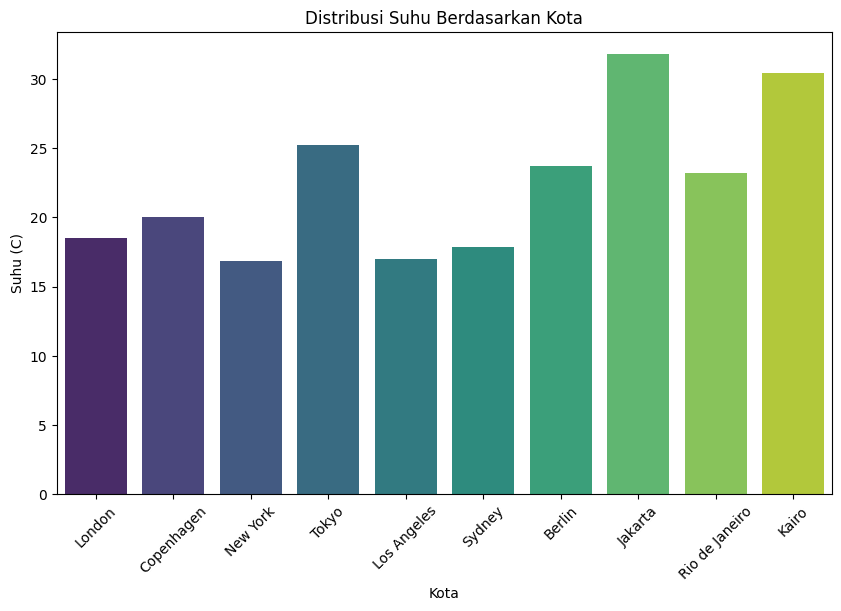

<ipython-input-5-1a22f4e061a0>:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Kondisi Cuaca", data=df_cuaca, palette="plasma")  # Menggunakan palet warna "plasma"


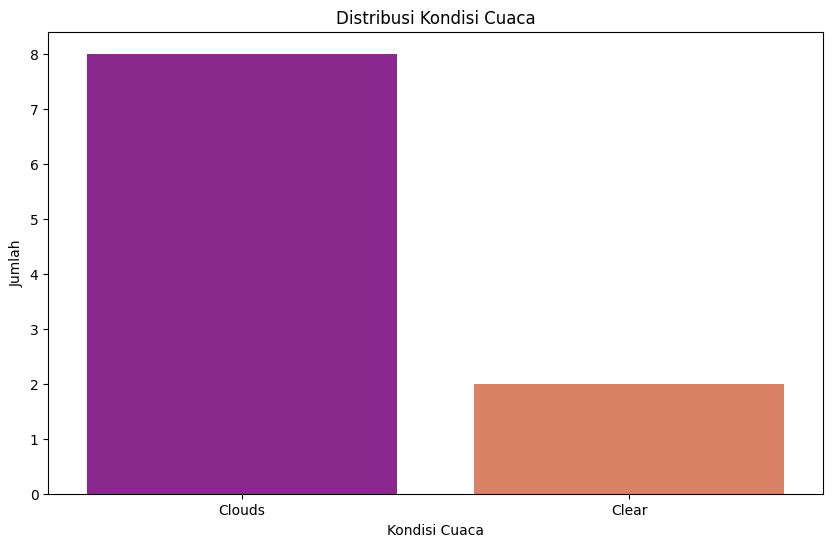

In [ ]:
# Library
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# API Key OpenWeatherMap milikmu
API_KEY = "API_KEY_DIRIMU"

# Daftar kota untuk mengambil data cuaca
kota_list = ["London", "Copenhagen", "New York", "Tokyo", "Los Angeles", "Sydney", "Berlin", "Jakarta", "Rio de Janeiro", "Kairo"]

# URL API untuk OpenWeatherMap
def ambil_data_cuaca(kota, api_key):
    url = f"http://api.openweathermap.org/data/2.5/weather?q={kota}&appid={api_key}&units=metric"
    response = requests.get(url)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Gagal mendapatkan data untuk {kota}. Status Code: {response.status_code}, Pesan: {response.text}")
        return None

# Fungsi untuk mengambil data cuaca dari semua kota
def ambil_data_cuaca_kota(kota_list, api_key):
    data_cuaca = []
    for kota in kota_list:
        data = ambil_data_cuaca(kota, api_key)
        if data and data["cod"] == 200:  # Memeriksa apakah permintaan API berhasil
            cuaca = {
                "Kota": kota,
                "Suhu (C)": data["main"]["temp"],
                "Kelembaban (%)": data["main"]["humidity"],
                "Kondisi Cuaca": data["weather"][0]["main"]
            }
            data_cuaca.append(cuaca)
        else:
            print(f"Gagal mendapatkan data cuaca untuk {kota}")
    return pd.DataFrame(data_cuaca)

# Mengambil data cuaca dan menyimpannya dalam file CSV
df_cuaca = ambil_data_cuaca_kota(kota_list, API_KEY)
if not df_cuaca.empty:
    df_cuaca.to_csv("data_cuaca.csv", index=False)
    print("Data cuaca telah disimpan dalam file 'data_cuaca.csv'.")
else:
    print("Tidak ada data yang disimpan karena gagal mendapatkan data cuaca.")

# Membaca data dari CSV untuk analisis (opsional, karena data sudah ada di memori)
if not df_cuaca.empty:
    df_cuaca = pd.read_csv("data_cuaca.csv")

    # Menampilkan data
    print("Data Cuaca:")
    print(df_cuaca)

    # Analisis Data: Menghitung rata-rata suhu
    rata_rata_suhu = df_cuaca["Suhu (C)"].mean()
    print(f"\nRata-rata suhu dari semua kota: {rata_rata_suhu:.2f}°C")

    # Menemukan kota dengan suhu tertinggi dan terendah
    kota_suhu_tertinggi = df_cuaca.loc[df_cuaca["Suhu (C)"].idxmax()]["Kota"]
    kota_suhu_terendah = df_cuaca.loc[df_cuaca["Suhu (C)"].idxmin()]["Kota"]
    print(f"Kota dengan suhu tertinggi: {kota_suhu_tertinggi}")
    print(f"Kota dengan suhu terendah: {kota_suhu_terendah}")

    # Menganalisis kondisi cuaca yang paling umum
    kondisi_cuaca_umum = df_cuaca["Kondisi Cuaca"].value_counts().idxmax()
    print(f"Kondisi cuaca yang paling umum: {kondisi_cuaca_umum}")

    # Visualisasi Data: Distribusi suhu dengan warna berbeda
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Kota", y="Suhu (C)", data=df_cuaca, palette="viridis")  # Menggunakan palet warna "viridis"
    plt.title("Distribusi Suhu Berdasarkan Kota")
    plt.xlabel("Kota")
    plt.ylabel("Suhu (C)")
    plt.xticks(rotation=45)
    plt.show()

    # Visualisasi Data: Distribusi Kondisi Cuaca dengan warna berbeda
    plt.figure(figsize=(10, 6))
    sns.countplot(x="Kondisi Cuaca", data=df_cuaca, palette="plasma")  # Menggunakan palet warna "plasma"
    plt.title("Distribusi Kondisi Cuaca")
    plt.xlabel("Kondisi Cuaca")
    plt.ylabel("Jumlah")
    plt.show()
else:
    print("Tidak ada data untuk dianalisis.")
